<a href="https://colab.research.google.com/github/hihohub/umbrella-networks/blob/main/etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Umbrella networks
- copyright 2021 by James Smith
- contact - derekjsmit@gmail.com

Demonstration instructions
- Examples of helpful functions like save, load, and display predicted labels.
- Organize your image files into folders by category. For example, (book covers) -> (scifi), (fantasy), (mystery).
- First, run the large cell containing the umbrella code, then scroll down 1333 lines to the experiment.
- Change the folder name in the demonstration code to your folder path.
- The rest of the code should work as written.
- Set 'levels' to anywhere from 1 to the number of layers in your folder structure. If levels=1, images from lower level folders are compressed into the outer level folders. If levels > 1, umbrella networks are formed recursively, one for each outer folder and each subfolder within the outer folders, up to the specified number of levels. The inner folders do not each require the same number of levels, but must have at least as many levels as the value specified for 'levels'.

Umbrella network instructions<br/>
- The umbrella code was designed for reading a local folder and automatically constructing the hierarchical network from the implicit hierarchy in the subfolders.
- If have images in folders, initialize with images_folder = path. Umbrella network constructs tree by itself. Refer to examples.
- However, it also has functions for reading the data from an online repository and building the tree node by node (since the data has no folder structure).
- If loading data from repository, initialize with images_folder = None, then use repo functions. Must first preprocess the data (normalize, reshape). Only process x data, not labels. Umbrella network constructs labels by itself. However, subdivide classes by label, then manually construct tree with repo functions. Finally, init_from_repo(). Refer to examples.
- In repo mode, umbrella network throws away labels and makes its own. For example, if divide MNIST into odd and even numbers, each subset will have labels 0-4. Hence, anything other than flat topology requires that the umbrella network form new labels.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


%%%%%%%%%%%%%%%%%%<br/>
UMBRELLA NETWORK<br/>
%%%%%%%%%%%%%%%%%%<br/>

In [ ]:
! wget https://raw.githubusercontent.com/hihohub/umbrella-networks/main/umbrella.py

--2022-04-15 04:27:27--  https://raw.githubusercontent.com/hihohub/umbrella-networks/main/umbrella.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48219 (47K) [text/plain]
Saving to: ‘umbrella.py’

umbrella.py         100%[===================>]  47.09K  --.-KB/s    in 0.001s  

2022-04-15 04:27:27 (45.6 MB/s) - ‘umbrella.py’ saved [48219/48219]



In [ ]:
from umbrella import Umbrella_Network,Umbrella_Label,Umbrella_Node,Joint_Probability_Network

In [ ]:
import os
import sys
import numpy as np
import math
import random
from PIL import Image, ImageOps, ImageChops
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, add, BatchNormalization, Dropout, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.python.framework.ops import disable_eager_execution
from tensorflow.keras import backend as backend
from keras.callbacks import ReduceLROnPlateau
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
import copy
import time

- ##################
- Demonstrate helpful functions
- when predicting validation or test images, set verbose=True to view images and predicted labels
- save images separately from models, always save images first
- load both when reloading, always load images first
- ##################

SIGMOID ON SMALL MULTI-LAYER STRUCTURE COMPRESSED INTO TOP LEVEL FOLDERS

In [ ]:
network_type = 'sigmoid'
images_folder = "/content/drive/My Drive/5390/project/small_hierarchy"
serial_file = "/content/drive/My Drive/Colab Notebooks/small_hierarchy.dat"
models_folder = "/content/drive/My Drive/Colab Notebooks/models"
target_image_size = 30
levels = 2
channels = 3
valid_ratio = 0.1 # validation set
test_ratio = 0.0 # test set
initialize_now = True
MODEL = Umbrella_Network(network_type,images_folder,serial_file,models_folder,target_image_size,channels,levels,valid_ratio,test_ratio,initialize_now)

In [ ]:
MODEL.traverse_training_data()

small_hierarchy trainX 0 (0,) trainY 0 (0,)
   animals trainX 79 (79,) trainY 79 (79,)
      alligator trainX 11 (11,) trainY 11 (11,)
      mammals trainX 33 (33,) trainY 33 (33,)
      salamanders trainX 18 (18,) trainY 18 (18,)
      snake trainX 18 (18,) trainY 18 (18,)
   objects trainX 115 (115,) trainY 115 (115,)
      automobiles trainX 39 (39,) trainY 39 (39,)
      bicycles trainX 31 (31,) trainY 31 (31,)
      boats trainX 47 (47,) trainY 47 (47,)
   plants trainX 116 (116,) trainY 116 (116,)
      cactus trainX 27 (27,) trainY 27 (27,)
      hedges trainX 39 (39,) trainY 39 (39,)
      shrubs trainX 52 (52,) trainY 52 (52,)


In [ ]:
MODEL.make_models()

making model for animals
making model for alligator
making model for mammals
making model for salamanders
making model for snake
making model for objects
making model for automobiles
making model for bicycles
making model for boats
making model for plants
making model for cactus
making model for hedges
making model for shrubs


In [ ]:
MODEL.train_models(eps=1,batch=10,aug=False,vrb=True)

training model for animals
trainX 79
trainY 79
8/8 [==============================] - 10s 9ms/step - loss: 0.7069 - accuracy: 0.4557
training model for alligator
trainX 11
trainY 11
2/2 [==============================] - 1s 338ms/step - loss: 0.7198 - accuracy: 0.4545
training model for mammals
trainX 33
trainY 33
4/4 [==============================] - 0s 14ms/step - loss: 0.6998 - accuracy: 0.5152
training model for salamanders
trainX 18
trainY 18
2/2 [==============================] - 0s 38ms/step - loss: 0.7169 - accuracy: 0.3889
training model for snake
trainX 18
trainY 18
2/2 [==============================] - 0s 9ms/step - loss: 0.6954 - accuracy: 0.4444
training model for objects
trainX 115
trainY 115
12/12 [==============================] - 0s 6ms/step - loss: 0.7055 - accuracy: 0.4957
training model for automobiles
trainX 39
trainY 39
4/4 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5641
training model for bicycles
trainX 31
trainY 31
4/4 [======

average training accuracy 0.480344
average training loss 0.706202
17


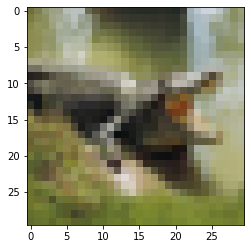


valid
animals 1
alligator 1
small_hierarchy [1, 0, 0]
  animals [1, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5371452569961548
boats 0.4961076080799103
small_hierarchy [0.48399215936660767, 0.5371452569961548, 0.532539427280426]
  animals [0.4615330696105957, 0.49391505122184753, 0.4492632746696472, 0.4472190737724304]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.3575744032859802, 0.4129439890384674, 0.4961076080799103]
    automobiles []
    bicycles []
    boats []
  plants [0.5030109286308289, 0.3679872751235962, 0.4285881221294403]
    cactus []
    hedges []
    shrubs []


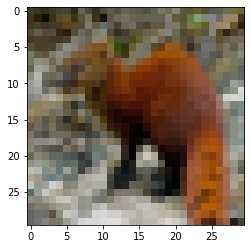


valid
animals 1
mammals 1
small_hierarchy [1, 0, 0]
  animals [0, 1, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
plants 0.5275911092758179
cactus 0.5202823877334595
small_hierarchy [0.4975723326206207, 0.5244254469871521, 0.5275911092758179]
  animals [0.4455568790435791, 0.4868119955062866, 0.46120700240135193, 0.4324253797531128]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.3743806481361389, 0.3842593729496002, 0.5045463442802429]
    automobiles []
    bicycles []
    boats []
  plants [0.5202823877334595, 0.39346396923065186, 0.4519208073616028]
    cactus []
    hedges []
    shrubs []


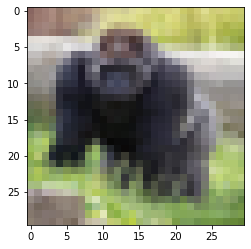


valid
animals 1
mammals 1
small_hierarchy [1, 0, 0]
  animals [0, 1, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
plants 0.5438008904457092
cactus 0.488628625869751
small_hierarchy [0.48359036445617676, 0.537584662437439, 0.5438008904457092]
  animals [0.44762369990348816, 0.4919336438179016, 0.43844661116600037, 0.4431186020374298]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.34932151436805725, 0.39094841480255127, 0.5093994736671448]
    automobiles []
    bicycles []
    boats []
  plants [0.488628625869751, 0.3886926472187042, 0.4359206557273865]
    cactus []
    hedges []
    shrubs []


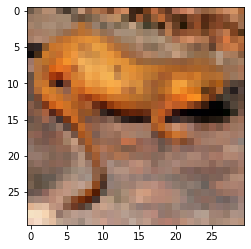


valid
animals 1
salamanders 1
small_hierarchy [1, 0, 0]
  animals [0, 0, 1, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
plants 0.5419476628303528
cactus 0.5075687170028687
small_hierarchy [0.48665130138397217, 0.5380622744560242, 0.5419476628303528]
  animals [0.4519912004470825, 0.47700098156929016, 0.4667128026485443, 0.442737340927124]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.38947242498397827, 0.3932400643825531, 0.5026938915252686]
    automobiles []
    bicycles []
    boats []
  plants [0.5075687170028687, 0.37232720851898193, 0.4567742645740509]
    cactus []
    hedges []
    shrubs []


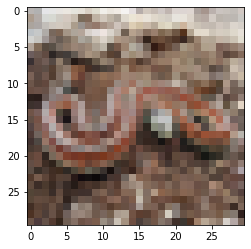


valid
animals 1
snake 1
small_hierarchy [1, 0, 0]
  animals [0, 0, 0, 1]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5606759786605835
boats 0.5124273896217346
small_hierarchy [0.47824323177337646, 0.5606759786605835, 0.5399994850158691]
  animals [0.4351181387901306, 0.4874553978443146, 0.46991589665412903, 0.44290241599082947]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.35641348361968994, 0.37244006991386414, 0.5124273896217346]
    automobiles []
    bicycles []
    boats []
  plants [0.5289835333824158, 0.36056625843048096, 0.42520710825920105]
    cactus []
    hedges []
    shrubs []


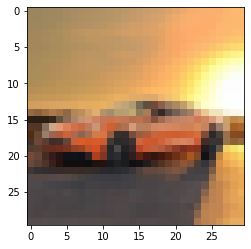


valid
objects 1
automobiles 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [1, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.530635416507721
boats 0.5212450623512268
small_hierarchy [0.47573918104171753, 0.530635416507721, 0.527158796787262]
  animals [0.46229803562164307, 0.479194700717926, 0.45502209663391113, 0.42537710070610046]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.42368051409721375, 0.36375123262405396, 0.5212450623512268]
    automobiles []
    bicycles []
    boats []
  plants [0.5205529928207397, 0.3695710599422455, 0.4511156976222992]
    cactus []
    hedges []
    shrubs []


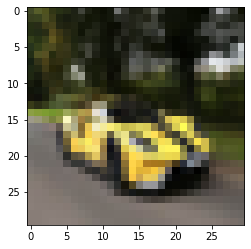


valid
objects 1
automobiles 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [1, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5421547889709473
boats 0.4933847188949585
small_hierarchy [0.4996594190597534, 0.5421547889709473, 0.5092897415161133]
  animals [0.44379591941833496, 0.48184359073638916, 0.4401018023490906, 0.4253038763999939]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.355951189994812, 0.3844924569129944, 0.4933847188949585]
    automobiles []
    bicycles []
    boats []
  plants [0.5325988531112671, 0.3803137540817261, 0.4100826382637024]
    cactus []
    hedges []
    shrubs []


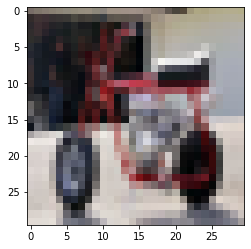


valid
objects 1
bicycles 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 1, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5638636946678162
boats 0.503455638885498
small_hierarchy [0.4960595965385437, 0.5638636946678162, 0.5038734078407288]
  animals [0.4300708770751953, 0.4865245223045349, 0.4311882257461548, 0.41376054286956787]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.32276952266693115, 0.38550472259521484, 0.503455638885498]
    automobiles []
    bicycles []
    boats []
  plants [0.5715141296386719, 0.3553972542285919, 0.4084893763065338]
    cactus []
    hedges []
    shrubs []


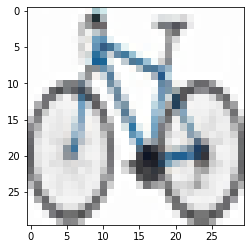


valid
objects 1
bicycles 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 1, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.6084365844726562
boats 0.5215160846710205
small_hierarchy [0.47439321875572205, 0.6084365844726562, 0.5369652509689331]
  animals [0.4043286442756653, 0.49698784947395325, 0.39843976497650146, 0.36596444249153137]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.2210543155670166, 0.3330153822898865, 0.5215160846710205]
    automobiles []
    bicycles []
    boats []
  plants [0.6042451858520508, 0.26948341727256775, 0.379686564207077]
    cactus []
    hedges []
    shrubs []


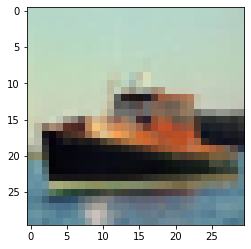


valid
objects 1
boats 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 1]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5570470094680786
boats 0.5238544344902039
small_hierarchy [0.4643262028694153, 0.5570470094680786, 0.5171902179718018]
  animals [0.4462651312351227, 0.48896390199661255, 0.4365338981151581, 0.4431532919406891]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.3428725004196167, 0.3524186313152313, 0.5238544344902039]
    automobiles []
    bicycles []
    boats []
  plants [0.5130327939987183, 0.3535624146461487, 0.4436136484146118]
    cactus []
    hedges []
    shrubs []


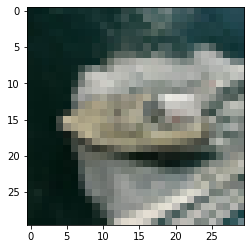


valid
objects 1
boats 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 1]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5426350235939026
boats 0.5020428895950317
small_hierarchy [0.5020760893821716, 0.5426350235939026, 0.51593416929245]
  animals [0.4437226951122284, 0.49464666843414307, 0.4543357491493225, 0.42938846349716187]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.37390127778053284, 0.4068041741847992, 0.5020428895950317]
    automobiles []
    bicycles []
    boats []
  plants [0.5359157919883728, 0.3835203945636749, 0.43313363194465637]
    cactus []
    hedges []
    shrubs []


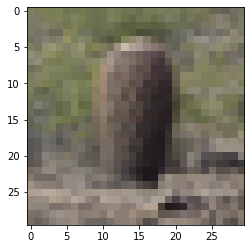


valid
plants 1
cactus 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [1, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
plants 0.557915210723877
cactus 0.5087634325027466
small_hierarchy [0.48998546600341797, 0.5286506414413452, 0.557915210723877]
  animals [0.4572218954563141, 0.49608540534973145, 0.4624561071395874, 0.4369058609008789]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.3619658052921295, 0.41007110476493835, 0.49723753333091736]
    automobiles []
    bicycles []
    boats []
  plants [0.5087634325027466, 0.39599329233169556, 0.45212703943252563]
    cactus []
    hedges []
    shrubs []


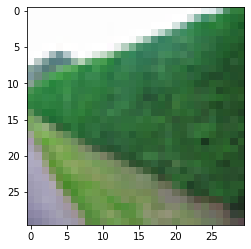


valid
plants 1
hedges 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 1, 0]
    cactus []
    hedges []
    shrubs []

predicted
plants 0.587756872177124
cactus 0.47740820050239563
small_hierarchy [0.46637681126594543, 0.5406249165534973, 0.587756872177124]
  animals [0.44609391689300537, 0.4971497654914856, 0.4391920268535614, 0.4966803193092346]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.3402383625507355, 0.4113558232784271, 0.4991641342639923]
    automobiles []
    bicycles []
    boats []
  plants [0.47740820050239563, 0.3910239338874817, 0.43769726157188416]
    cactus []
    hedges []
    shrubs []


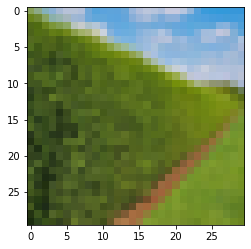


valid
plants 1
hedges 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 1, 0]
    cactus []
    hedges []
    shrubs []

predicted
plants 0.5862438082695007
cactus 0.465058296918869
small_hierarchy [0.48568838834762573, 0.5200430154800415, 0.5862438082695007]
  animals [0.4490455985069275, 0.49047204852104187, 0.46783357858657837, 0.4694008529186249]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.4053249657154083, 0.3943130671977997, 0.5076522827148438]
    automobiles []
    bicycles []
    boats []
  plants [0.465058296918869, 0.41367465257644653, 0.4466885030269623]
    cactus []
    hedges []
    shrubs []


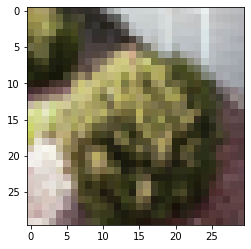


valid
plants 1
shrubs 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 1]
    cactus []
    hedges []
    shrubs []

predicted
plants 0.55873042345047
cactus 0.5574665069580078
small_hierarchy [0.4811970591545105, 0.5523065328598022, 0.55873042345047]
  animals [0.43236076831817627, 0.4813835620880127, 0.45066624879837036, 0.4269598424434662]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.33395135402679443, 0.36589524149894714, 0.49779215455055237]
    automobiles []
    bicycles []
    boats []
  plants [0.5574665069580078, 0.35677608847618103, 0.4368100166320801]
    cactus []
    hedges []
    shrubs []


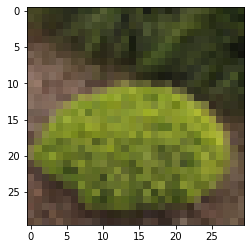


valid
plants 1
shrubs 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 1]
    cactus []
    hedges []
    shrubs []

predicted
plants 0.5476221442222595
cactus 0.5235159397125244
small_hierarchy [0.49886175990104675, 0.5098446011543274, 0.5476221442222595]
  animals [0.4597322642803192, 0.4896809756755829, 0.4699939489364624, 0.45793113112449646]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.3979512155056, 0.4256622791290283, 0.4963206946849823]
    automobiles []
    bicycles []
    boats []
  plants [0.5235159397125244, 0.4035838544368744, 0.4601014256477356]
    cactus []
    hedges []
    shrubs []


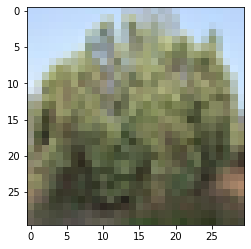


valid
plants 1
shrubs 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 1]
    cactus []
    hedges []
    shrubs []

predicted
plants 0.5660650730133057
cactus 0.5057623386383057
small_hierarchy [0.46637019515037537, 0.5437350869178772, 0.5660650730133057]
  animals [0.4549998342990875, 0.4912193715572357, 0.4465519189834595, 0.464261531829834]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.36140236258506775, 0.380631685256958, 0.5189875364303589]
    automobiles []
    bicycles []
    boats []
  plants [0.5057623386383057, 0.37982749938964844, 0.43610841035842896]
    cactus []
    hedges []
    shrubs []

average validation accuracy 0.176471
top 5 accuracy 0.71


In [ ]:
MODEL.get_training_accuracy()
MODEL.predict_validation_set(verbose=True) # set verbose=True to view all the images
MODEL.predict_validation_top5()

SAVE AND LOAD IMAGES AND MODELS

In [ ]:
network_type = 'sigmoid'
images_folder = "/content/drive/My Drive/5390/project/small_hierarchy"
serial_file = "/content/drive/My Drive/Colab Notebooks/small_hierarchy.dat"
models_folder = "/content/drive/My Drive/Colab Notebooks/models"
target_image_size = 30
levels = 1
channels = 3
valid_ratio = 0.1 # validation set
test_ratio = 0.0 # test set
initialize_now = True
SIGMOID = Umbrella_Network(network_type,images_folder,serial_file,models_folder,target_image_size,channels,levels,valid_ratio,test_ratio,initialize_now)

In [ ]:
SIGMOID.traverse_training_data()

small_hierarchy trainX 0 (0,) trainY 0 (0,)
   animals trainX 79 (79,) trainY 79 (79,)
      alligator trainX 0 (0,) trainY 0 (0,)
      mammals trainX 0 (0,) trainY 0 (0,)
      salamanders trainX 0 (0,) trainY 0 (0,)
      snake trainX 0 (0,) trainY 0 (0,)
   objects trainX 115 (115,) trainY 115 (115,)
      automobiles trainX 0 (0,) trainY 0 (0,)
      bicycles trainX 0 (0,) trainY 0 (0,)
      boats trainX 0 (0,) trainY 0 (0,)
   plants trainX 116 (116,) trainY 116 (116,)
      cactus trainX 0 (0,) trainY 0 (0,)
      hedges trainX 0 (0,) trainY 0 (0,)
      shrubs trainX 0 (0,) trainY 0 (0,)


In [ ]:
SIGMOID.make_models()

making model for animals
making model for objects
making model for plants


In [ ]:
SIGMOID.train_models(eps=1)

In [ ]:
SIGMOID.save_models() # always save models before saving images
SIGMOID.save_images() # removes models, then saves entire object

animals
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/model1/assets
objects
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/model2/assets
plants
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/model3/assets
INFO:tensorflow:Assets written to: ram://f39cfaaf-ca38-4255-acc0-47e28d94d777/assets
INFO:tensorflow:Assets written to: ram://56d45a6b-4e07-4a64-9fa6-89e9a787ba3c/assets
INFO:tensorflow:Assets written to: ram://06161e93-74ce-4503-8434-e5fd64ea8dff/assets


When reloading a model and its images, set initialize_now = False

In [ ]:
network_type = 'sigmoid'
images_folder = "/content/drive/My Drive/5390/project/small_hierarchy"
serial_file = "/content/drive/My Drive/Colab Notebooks/small_hierarchy.dat"
models_folder = "/content/drive/My Drive/Colab Notebooks/models"
target_image_size = 30
levels = 1
channels = 3
valid_ratio = 0.1 # validation set
test_ratio = 0.0 # test set
initialize_now = False
RELOAD = Umbrella_Network(network_type,images_folder,serial_file,models_folder,target_image_size,channels,levels,valid_ratio,test_ratio,initialize_now)

In [ ]:
RELOAD.load_images() # always load images before loading models, loads entire object
RELOAD.load_models() # requires object already loaded

model loaded into animals
model loaded into objects
model loaded into plants
could not load model for alligator
could not load model for mammals
could not load model for salamanders
could not load model for snake
could not load model for automobiles
could not load model for bicycles
could not load model for boats
could not load model for cactus
could not load model for hedges
could not load model for shrubs


In [ ]:
RELOAD.traverse_training_data()

small_hierarchy trainX 0 (0,) trainY 0 (0,)
   animals trainX 79 (79,) trainY 79 (79,)
      alligator trainX 0 (0,) trainY 0 (0,)
      mammals trainX 0 (0,) trainY 0 (0,)
      salamanders trainX 0 (0,) trainY 0 (0,)
      snake trainX 0 (0,) trainY 0 (0,)
   objects trainX 115 (115,) trainY 115 (115,)
      automobiles trainX 0 (0,) trainY 0 (0,)
      bicycles trainX 0 (0,) trainY 0 (0,)
      boats trainX 0 (0,) trainY 0 (0,)
   plants trainX 116 (116,) trainY 116 (116,)
      cactus trainX 0 (0,) trainY 0 (0,)
      hedges trainX 0 (0,) trainY 0 (0,)
      shrubs trainX 0 (0,) trainY 0 (0,)
